In [74]:
# https://stackoverflow.com/questions/39707080/pandas-alternative-to-rank-function-that-gives-unique-ordinal-ranks-for-a-co
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
# To hop nao la tot nhat (imbl, clf)
# Columns chart
# Ti le mat can bang anh huong nhu the nao den ket qua
# 

In [30]:
def ranking_df(df,group_col='clf', rankby='f1'):
    df_new = df.copy()
#     df_new = df_new.replace(0,np.nan)
    df_new["rank"] = df_new.groupby(group_col)[rankby].rank('min', ascending=False, na_option='keep')
    
    return df_new

def compute_avarage_folds(dataframe, path_to_csv):
    """Compute average final submission and save to csv to rank"""
    lst = []
    for _, df in dataframe.groupby(['imbl','clf', 'name']):
        metric_dict = df.mean().to_dict()
        d = {
            'clf': df.clf.tolist()[0],
            'imbl': df.imbl.tolist()[0],
            'name': df.dataset.tolist()[0],
            'precision': metric_dict['precision'],
            'recall': metric_dict['recall'],
            'specificity': metric_dict['specificity'],
            'f1': metric_dict['fscore'],
            'gmean': metric_dict['gmean'],
            'mcc': metric_dict['mcc'],
            'balanced_acc': metric_dict['balanced_acc'],
            'accuracy': metric_dict['accuracy'],
        }
        lst.append(d)
    dframe = pd.DataFrame(lst).to_csv(path_to_csv, index=False)

def final_submission_csv(path):
    fname = 'imbl_submission.csv'

    for res_file in os.listdir(path):
        path_to_result = path+'/'+res_file + '/' + fname
        path_to_csv = path+'/'+res_file + '/' + 'final_submission_{0}.csv'.format(res_file)
        df = pd.read_csv(path_to_result)
        df = pd.read_csv(path_to_result).to_csv(path_to_csv, index=False)
        #compute_avarage_folds(df,path_to_csv)
        
        
def create_table_ranking_from_file(by_metric= 'f1', path='./result/raw', get_cols=['clf', 'imbl', 'dataset', 'rank']):
    res_df = pd.DataFrame()
    hist_df = pd.DataFrame()

    # path = './result/raw'
    #get_cols=['clf', 'imbl', 'name', 'rank']

    for res_file in os.listdir(path):
        print(res_file)
        path_final_sub = path+'/'+res_file+'/final_submission_{0}.csv'.format(res_file)
        df = pd.read_csv(path_final_sub)
        hist_df = hist_df.append(df)
        df_ranking = ranking_df(df,'clf',by_metric)[get_cols]
        res_df = res_df.append(df_ranking)
        
    return res_df, hist_df.merge(res_df)

# Create final submission

In [31]:
# res_df = pd.DataFrame()

# path = './result/sub_2022-02-13'
# final_submission_csv(path)

# Ranking

In [32]:
# res_df = pd.DataFrame()
# hist_df = pd.DataFrame()

# path = './result/sub_2022-02-13'
# get_cols=['clf', 'imbl', 'name', 'rank']

# for res_file in os.listdir(path):
#     path_final_sub = path+'/'+res_file+'/final_submission_{0}.csv'.format(res_file)
#     df = pd.read_csv(path_final_sub)
#     hist_df = hist_df.append(df)
#     df_ranking = ranking_df(df,'clf','gmean')[get_cols]
#     res_df = res_df.append(df_ranking)

In [ ]:
# result_table=pd.read_csv('all_results_sub_2022-02-13.csv')
# result_table

In [33]:
by_metric='gmean'
ranking_table, result_table = create_table_ranking_from_file(by_metric, path='./result/sub_2022-02-13')

breast-cancer
caesarian
dataR2
diabetes


In [38]:
ranking_table.query('dataset=="breast-cancer_10" & clf=="SVM"').sort_values("rank")

,clf,imbl,dataset,rank
110,SVM,RandomOverSampler,breast-cancer_10,1.0
109,SVM,ProWSyn,breast-cancer_10,2.0
103,SVM,AMSCO,breast-cancer_10,3.0
112,SVM,SMOTE,breast-cancer_10,4.0
113,SVM,Smote_tomek,breast-cancer_10,5.0
102,SVM,ADASYN,breast-cancer_10,6.0
106,SVM,Lee,breast-cancer_10,17.0
116,SVM,lvq_smote,breast-cancer_10,32.0
111,SVM,RandomUnderSampler,breast-cancer_10,36.0
104,SVM,Borderline_smote,breast-cancer_10,60.0


In [58]:
gmean_df=result_table[['clf','imbl', 'dataset', 'gmean']]
gmean_df

,clf,imbl,dataset,gmean
0,Adaboost,ADASYN,breast-cancer_10,0.628217
1,Adaboost,AMSCO,breast-cancer_10,0.606320
2,Adaboost,Borderline_smote,breast-cancer_10,0.573631
3,Adaboost,EditedNearestNeighbours,breast-cancer_10,0.147003
4,Adaboost,Lee,breast-cancer_10,0.622540
...,...,...,...,...
3055,kNN,Tomek,diabetes_90,0.962500
3056,kNN,kmeans_SMOTE,diabetes_90,0.961797
3057,kNN,lvq_smote,diabetes_90,0.961718
3058,kNN,polynom_fit_SMOTE,diabetes_90,0.950509


In [59]:
#gmean_df['ratio_ds']=gmean_df.dataset.apply(lambda x: x[-2:])
gmean_df['combine']=gmean_df['clf']+"_"+gmean_df['imbl']
gmean_df

C:\Users\AnNg\AppData\Local\Temp/ipykernel_1436/3920151509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gmean_df['combine']=gmean_df['clf']+"_"+gmean_df['imbl']


,clf,imbl,dataset,gmean,combine
0,Adaboost,ADASYN,breast-cancer_10,0.628217,Adaboost_ADASYN
1,Adaboost,AMSCO,breast-cancer_10,0.606320,Adaboost_AMSCO
2,Adaboost,Borderline_smote,breast-cancer_10,0.573631,Adaboost_Borderline_smote
3,Adaboost,EditedNearestNeighbours,breast-cancer_10,0.147003,Adaboost_EditedNearestNeighbours
4,Adaboost,Lee,breast-cancer_10,0.622540,Adaboost_Lee
...,...,...,...,...,...
3055,kNN,Tomek,diabetes_90,0.962500,kNN_Tomek
3056,kNN,kmeans_SMOTE,diabetes_90,0.961797,kNN_kmeans_SMOTE
3057,kNN,lvq_smote,diabetes_90,0.961718,kNN_lvq_smote
3058,kNN,polynom_fit_SMOTE,diabetes_90,0.950509,kNN_polynom_fit_SMOTE


In [61]:
rank_df=ranking_df(gmean_df,group_col=['dataset'], rankby='gmean')
rank_df

,clf,imbl,dataset,gmean,combine,rank
0,Adaboost,ADASYN,breast-cancer_10,0.628217,Adaboost_ADASYN,98.0
1,Adaboost,AMSCO,breast-cancer_10,0.606320,Adaboost_AMSCO,106.0
2,Adaboost,Borderline_smote,breast-cancer_10,0.573631,Adaboost_Borderline_smote,118.0
3,Adaboost,EditedNearestNeighbours,breast-cancer_10,0.147003,Adaboost_EditedNearestNeighbours,148.0
4,Adaboost,Lee,breast-cancer_10,0.622540,Adaboost_Lee,100.0
...,...,...,...,...,...,...
3055,kNN,Tomek,diabetes_90,0.962500,kNN_Tomek,97.0
3056,kNN,kmeans_SMOTE,diabetes_90,0.961797,kNN_kmeans_SMOTE,104.0
3057,kNN,lvq_smote,diabetes_90,0.961718,kNN_lvq_smote,105.0
3058,kNN,polynom_fit_SMOTE,diabetes_90,0.950509,kNN_polynom_fit_SMOTE,112.0


In [64]:
rank_df.query('dataset=="breast-cancer_10"').sort_values("rank")

,clf,imbl,dataset,gmean,combine,rank
133,Xgboost,lvq_smote,breast-cancer_10,0.790605,Xgboost_lvq_smote,1.0
127,Xgboost,RandomOverSampler,breast-cancer_10,0.779757,Xgboost_RandomOverSampler,2.0
65,ExtraTree,lvq_smote,breast-cancer_10,0.770716,ExtraTree_lvq_smote,3.0
144,kNN,RandomOverSampler,breast-cancer_10,0.764002,kNN_RandomOverSampler,4.0
53,ExtraTree,Borderline_smote,breast-cancer_10,0.762585,ExtraTree_Borderline_smote,5.0
...,...,...,...,...,...,...
20,Catboost,EditedNearestNeighbours,breast-cancer_10,0.099871,Catboost_EditedNearestNeighbours,149.0
12,Adaboost,Tomek,breast-cancer_10,0.086336,Adaboost_Tomek,150.0
16,Adaboost,pure,breast-cancer_10,0.063008,Adaboost_pure,151.0
29,Catboost,Tomek,breast-cancer_10,0.020000,Catboost_Tomek,152.0


In [140]:
rank_df.to_csv("./result/excel/raw_rank_avg.csv", index=True)

In [138]:
#new_df[['rank_avg']].sort_values("rank_avg").to_csv("./result/excel/rank_avg.csv", index=True)

In [101]:
new_df=pd.pivot_table(rank_df,index=['combine'],columns='dataset',values='rank')
new_df
#new_df['rank_avg'] = rank_df['avg'].rank(method='min', na_option='keep')


dataset,breast-cancer_10,breast-cancer_30,breast-cancer_50,breast-cancer_70,breast-cancer_90,caesarian_10,caesarian_30,caesarian_50,caesarian_70,caesarian_90,dataR2_10,dataR2_30,dataR2_50,dataR2_70,dataR2_90,diabetes_10,diabetes_30,diabetes_50,diabetes_70,diabetes_90
combine,,,,,,,,,,,,,,,,,,,,
Adaboost_ADASYN,98.0,95.0,131.0,130.0,129.0,89.0,52.0,69.0,76.0,70.0,24.0,18.0,33.0,45.0,33.0,106.0,112.0,131.0,130.0,128.0
Adaboost_AMSCO,106.0,152.0,153.0,145.0,138.0,87.0,49.0,61.0,75.0,78.0,31.0,37.0,47.0,67.0,58.0,105.0,109.0,126.0,126.0,126.0
Adaboost_Borderline_smote,118.0,132.0,148.0,147.0,132.0,64.0,57.0,63.0,86.0,66.0,91.0,21.0,32.0,58.0,61.0,79.0,128.0,133.0,134.0,115.0
Adaboost_EditedNearestNeighbours,148.0,101.0,115.0,152.0,153.0,80.0,67.0,123.0,146.0,148.0,73.0,60.0,77.0,97.0,128.0,62.0,115.0,118.0,135.0,135.0
Adaboost_Lee,100.0,84.0,93.0,127.0,131.0,88.0,51.0,72.0,71.0,72.0,28.0,4.0,23.0,46.0,37.0,103.0,120.0,127.0,129.0,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kNN_Tomek,145.0,142.0,123.0,97.0,123.0,140.0,131.0,96.0,114.0,109.0,152.0,148.0,147.0,135.0,109.0,125.0,73.0,102.0,92.0,97.0
kNN_kmeans_SMOTE,135.0,113.0,88.0,62.0,97.0,129.0,119.0,107.0,104.0,107.0,144.0,142.0,143.0,136.0,97.0,81.0,78.0,108.0,99.0,104.0
kNN_lvq_smote,6.0,48.0,56.0,56.0,96.0,48.0,89.0,99.0,113.0,104.0,84.0,118.0,120.0,117.0,98.0,6.0,68.0,105.0,102.0,105.0


In [102]:
new_df['avg'] = new_df.mean(axis=1, skipna=False)
new_df['rank_avg'] = new_df['avg'].rank(method='min', na_option='keep')
new_df

dataset,breast-cancer_10,breast-cancer_30,breast-cancer_50,breast-cancer_70,breast-cancer_90,caesarian_10,caesarian_30,caesarian_50,caesarian_70,caesarian_90,...,dataR2_50,dataR2_70,dataR2_90,diabetes_10,diabetes_30,diabetes_50,diabetes_70,diabetes_90,avg,rank_avg
combine,,,,,,,,,,,,,,,,,,,,,
Adaboost_ADASYN,98.0,95.0,131.0,130.0,129.0,89.0,52.0,69.0,76.0,70.0,...,33.0,45.0,33.0,106.0,112.0,131.0,130.0,128.0,84.95,87.0
Adaboost_AMSCO,106.0,152.0,153.0,145.0,138.0,87.0,49.0,61.0,75.0,78.0,...,47.0,67.0,58.0,105.0,109.0,126.0,126.0,126.0,93.80,103.0
Adaboost_Borderline_smote,118.0,132.0,148.0,147.0,132.0,64.0,57.0,63.0,86.0,66.0,...,32.0,58.0,61.0,79.0,128.0,133.0,134.0,115.0,93.25,102.0
Adaboost_EditedNearestNeighbours,148.0,101.0,115.0,152.0,153.0,80.0,67.0,123.0,146.0,148.0,...,77.0,97.0,128.0,62.0,115.0,118.0,135.0,135.0,111.65,129.0
Adaboost_Lee,100.0,84.0,93.0,127.0,131.0,88.0,51.0,72.0,71.0,72.0,...,23.0,46.0,37.0,103.0,120.0,127.0,129.0,119.0,81.25,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kNN_Tomek,145.0,142.0,123.0,97.0,123.0,140.0,131.0,96.0,114.0,109.0,...,147.0,135.0,109.0,125.0,73.0,102.0,92.0,97.0,120.00,136.0
kNN_kmeans_SMOTE,135.0,113.0,88.0,62.0,97.0,129.0,119.0,107.0,104.0,107.0,...,143.0,136.0,97.0,81.0,78.0,108.0,99.0,104.0,109.65,127.0
kNN_lvq_smote,6.0,48.0,56.0,56.0,96.0,48.0,89.0,99.0,113.0,104.0,...,120.0,117.0,98.0,6.0,68.0,105.0,102.0,105.0,81.90,80.0


In [126]:
new_df.sort_values("avg")

dataset,breast-cancer_10,breast-cancer_30,breast-cancer_50,breast-cancer_70,breast-cancer_90,caesarian_10,caesarian_30,caesarian_50,caesarian_70,caesarian_90,...,dataR2_50,dataR2_70,dataR2_90,diabetes_10,diabetes_30,diabetes_50,diabetes_70,diabetes_90,avg,rank_avg
combine,,,,,,,,,,,,,,,,,,,,,
Xgboost_lvq_smote,1.0,14.0,1.0,14.0,5.0,11.0,5.0,27.0,20.0,25.0,...,3.0,5.0,19.0,10.0,48.0,47.0,54.0,55.0,23.00,1.0
ExtraTree_RandomOverSampler,8.0,8.0,10.0,11.0,21.0,13.0,31.0,21.0,34.0,51.0,...,19.0,26.0,22.0,78.0,22.0,9.0,1.0,3.0,23.75,2.0
ExtraTree_SMOTE,29.0,9.0,14.0,4.0,15.0,18.0,27.0,32.0,37.0,33.0,...,24.0,28.0,30.0,42.0,9.0,16.0,9.0,5.0,24.30,3.0
ExtraTree_ADASYN,24.0,7.0,17.0,8.0,18.0,15.0,12.0,22.0,44.0,44.0,...,31.0,29.0,38.0,35.0,10.0,13.0,10.0,9.0,25.20,4.0
ExtraTree_lvq_smote,3.0,1.0,11.0,1.0,14.0,45.0,34.0,48.0,19.0,55.0,...,21.0,41.0,25.0,19.0,14.0,26.0,5.0,4.0,25.55,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Logit_NRAS,130.0,121.0,130.0,133.0,125.0,137.0,143.0,139.0,97.0,120.0,...,136.0,133.0,139.0,144.0,146.0,140.0,139.0,145.0,132.90,149.0
kNN_EditedNearestNeighbours,141.0,104.0,122.0,150.0,149.0,125.0,116.0,150.0,151.0,153.0,...,141.0,153.0,151.0,122.0,124.0,134.0,136.0,151.0,137.85,150.0
Logit_EditedNearestNeighbours,131.0,124.0,134.0,149.0,151.0,130.0,109.0,147.0,147.0,149.0,...,129.0,151.0,153.0,133.0,148.0,136.0,141.0,152.0,139.45,151.0


In [131]:
new_df.T.to_csv("./result/excel/rank_avg_combine.csv", index=True)

In [132]:
new_df[[]]

dataset,breast-cancer_10,breast-cancer_30,breast-cancer_50,breast-cancer_70,breast-cancer_90,caesarian_10,caesarian_30,caesarian_50,caesarian_70,caesarian_90,...,dataR2_50,dataR2_70,dataR2_90,diabetes_10,diabetes_30,diabetes_50,diabetes_70,diabetes_90,avg,rank_avg
combine,,,,,,,,,,,,,,,,,,,,,
Adaboost_ADASYN,98.0,95.0,131.0,130.0,129.0,89.0,52.0,69.0,76.0,70.0,...,33.0,45.0,33.0,106.0,112.0,131.0,130.0,128.0,84.95,87.0
Adaboost_AMSCO,106.0,152.0,153.0,145.0,138.0,87.0,49.0,61.0,75.0,78.0,...,47.0,67.0,58.0,105.0,109.0,126.0,126.0,126.0,93.80,103.0
Adaboost_Borderline_smote,118.0,132.0,148.0,147.0,132.0,64.0,57.0,63.0,86.0,66.0,...,32.0,58.0,61.0,79.0,128.0,133.0,134.0,115.0,93.25,102.0
Adaboost_EditedNearestNeighbours,148.0,101.0,115.0,152.0,153.0,80.0,67.0,123.0,146.0,148.0,...,77.0,97.0,128.0,62.0,115.0,118.0,135.0,135.0,111.65,129.0
Adaboost_Lee,100.0,84.0,93.0,127.0,131.0,88.0,51.0,72.0,71.0,72.0,...,23.0,46.0,37.0,103.0,120.0,127.0,129.0,119.0,81.25,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kNN_Tomek,145.0,142.0,123.0,97.0,123.0,140.0,131.0,96.0,114.0,109.0,...,147.0,135.0,109.0,125.0,73.0,102.0,92.0,97.0,120.00,136.0
kNN_kmeans_SMOTE,135.0,113.0,88.0,62.0,97.0,129.0,119.0,107.0,104.0,107.0,...,143.0,136.0,97.0,81.0,78.0,108.0,99.0,104.0,109.65,127.0
kNN_lvq_smote,6.0,48.0,56.0,56.0,96.0,48.0,89.0,99.0,113.0,104.0,...,120.0,117.0,98.0,6.0,68.0,105.0,102.0,105.0,81.90,80.0


In [125]:
#new_df.reset_index(drop=False, inplace=True)
pd.DataFrame(new_df.to_records()).to_csv("./result/excel/rank_avg_combine.csv", index=False)

<AxesSubplot:xlabel='combine', ylabel='rank_avg'>

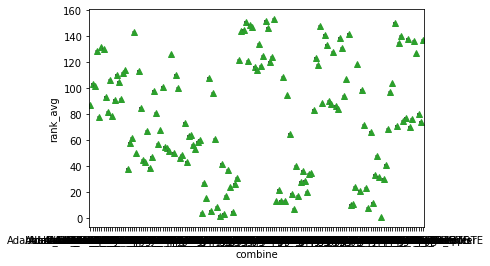

In [114]:
data_boxplot = pd.DataFrame(new_df.to_records())[['combine','rank_avg']]
#data_boxplot = data_boxplot.set_index(['combine'])
#group_boxplot = data_boxplot.groupby(['clf', 'imbl'])
#_data = data_boxplot.melt(id_vars=['rank_avg'])
sns.boxplot(x='combine', y="rank_avg", data=data_boxplot, showmeans=True, linewidth=1.5,  palette="tab20")

In [110]:
data_boxplot

,rank_avg
combine,
Adaboost_ADASYN,87.0
Adaboost_AMSCO,103.0
Adaboost_Borderline_smote,102.0
Adaboost_EditedNearestNeighbours,129.0
Adaboost_Lee,78.0
...,...
kNN_Tomek,136.0
kNN_kmeans_SMOTE,127.0
kNN_lvq_smote,80.0


In [96]:
data_boxplot

dataset,rank_avg
combine,
Adaboost_ADASYN,87.0
Adaboost_AMSCO,103.0
Adaboost_Borderline_smote,102.0
Adaboost_EditedNearestNeighbours,129.0
Adaboost_Lee,78.0
...,...
kNN_Tomek,136.0
kNN_kmeans_SMOTE,127.0
kNN_lvq_smote,80.0


In [83]:
plt.figure(figsize=(16,9))
data_boxplot = new_df.copy()[['rank_avg']]

#_data = data_boxplot.melt(id_vars=['rank_avg'])
sns.boxplot(x=, y="value", data=_data, showmeans=True, linewidth=1.5,  palette="tab20")
plt.grid()
# plt.set_ylabel('Rank', fontsize=12)
# plt.set_xlabel('Imbalance', fontsize=12)
# ax.set_title(f'{clf_name}', fontsize=14)
plt.xticks(rotation=70)
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_1436/1747211244.py, line 5)

# Viz

In [1]:
import plotly.express as px
import pandas as pd


In [3]:
data_boxplot = ranking_table.copy()[['clf', 'imbl', 'rank_avg']]
# data_boxplot = data_boxplot.set_index(['clf', 'imbl'])
group_boxplot = data_boxplot.groupby(['clf', 'imbl'])
group_boxplot.first()

rank_avg
clf      imbl                       
Adaboost ADASYN                 12.0
         Lee                     3.0
         ProWSyn                21.0
         borderline_smote       48.0
         kmeans_SMOTE           52.0
...                              ...
kNN      lvq_smote              55.0
         polynom_fit_SMOTE      37.0
         pure                   68.0
         smote_tomek             4.0
         tomek                  64.0

[70 rows x 1 columns]

In [4]:
ranking_table

,clf,imbl,breast-cancer,breast-cancer-coimbra,caesarian,cervical-cancer-behavior,cervical-cancer-risk,diabetes,diabetic-retinopathy-debrecen,eeg-eye-state,haberman,heart_failure_clinical_records_dataset,parkinson,sonar,avg,rank_avg
0,Adaboost,ADASYN,4.0,3.0,6.0,7.0,3.0,9.0,4.0,2.0,3.0,4.0,2.0,3.0,4.726190,12.0
1,Adaboost,Lee,3.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,2.0,5.0,1.0,2.0,2.922619,3.0
2,Adaboost,ProWSyn,5.0,7.0,3.0,4.0,4.0,4.0,5.0,3.0,4.0,3.0,6.0,8.0,5.833333,21.0
3,Adaboost,borderline_smote,9.0,2.0,9.0,2.0,6.0,10.0,8.0,1.0,5.0,10.0,4.0,7.0,9.077381,48.0
4,Adaboost,kmeans_SMOTE,1.0,6.0,5.0,9.0,5.0,2.0,7.0,9.0,9.0,7.0,9.0,5.0,9.440476,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,kNN,lvq_smote,8.0,4.0,5.0,8.0,6.0,4.0,9.0,9.0,5.0,7.0,8.0,5.0,9.964286,55.0
66,kNN,polynom_fit_SMOTE,6.0,5.0,9.0,1.0,1.0,10.0,6.0,10.0,4.0,6.0,7.0,1.0,7.750000,37.0
67,kNN,pure,10.0,7.0,3.0,10.0,10.0,6.0,6.0,8.0,9.0,10.0,9.0,9.0,12.363095,68.0
68,kNN,smote_tomek,1.0,1.0,2.0,7.0,4.0,3.0,2.0,2.0,2.0,2.0,3.0,8.0,3.148810,4.0


In [5]:
ranking_table.dropna()

,clf,imbl,breast-cancer,breast-cancer-coimbra,caesarian,cervical-cancer-behavior,cervical-cancer-risk,diabetes,diabetic-retinopathy-debrecen,eeg-eye-state,haberman,heart_failure_clinical_records_dataset,parkinson,sonar,avg,rank_avg
0,Adaboost,ADASYN,4.0,3.0,6.0,7.0,3.0,9.0,4.0,2.0,3.0,4.0,2.0,3.0,4.726190,12.0
1,Adaboost,Lee,3.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,2.0,5.0,1.0,2.0,2.922619,3.0
2,Adaboost,ProWSyn,5.0,7.0,3.0,4.0,4.0,4.0,5.0,3.0,4.0,3.0,6.0,8.0,5.833333,21.0
3,Adaboost,borderline_smote,9.0,2.0,9.0,2.0,6.0,10.0,8.0,1.0,5.0,10.0,4.0,7.0,9.077381,48.0
4,Adaboost,kmeans_SMOTE,1.0,6.0,5.0,9.0,5.0,2.0,7.0,9.0,9.0,7.0,9.0,5.0,9.440476,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,kNN,lvq_smote,8.0,4.0,5.0,8.0,6.0,4.0,9.0,9.0,5.0,7.0,8.0,5.0,9.964286,55.0
66,kNN,polynom_fit_SMOTE,6.0,5.0,9.0,1.0,1.0,10.0,6.0,10.0,4.0,6.0,7.0,1.0,7.750000,37.0
67,kNN,pure,10.0,7.0,3.0,10.0,10.0,6.0,6.0,8.0,9.0,10.0,9.0,9.0,12.363095,68.0
68,kNN,smote_tomek,1.0,1.0,2.0,7.0,4.0,3.0,2.0,2.0,2.0,2.0,3.0,8.0,3.148810,4.0


# Scatter

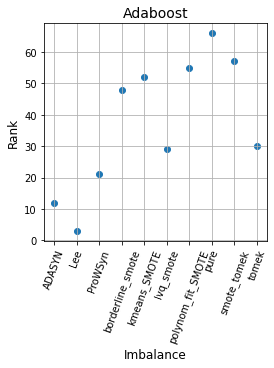

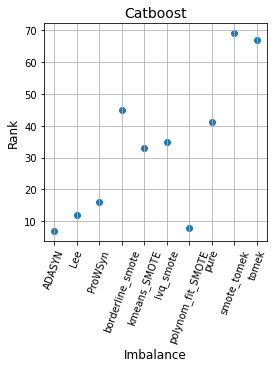

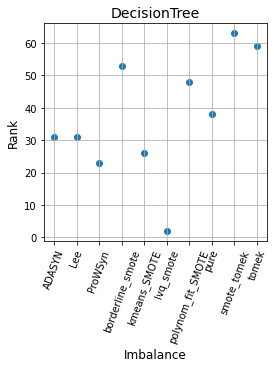

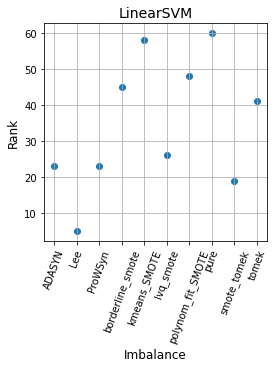

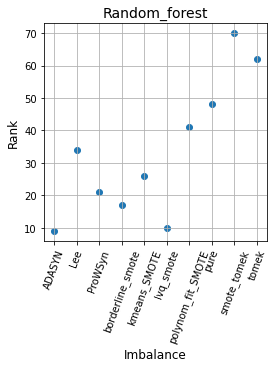

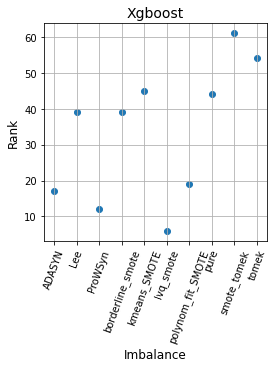

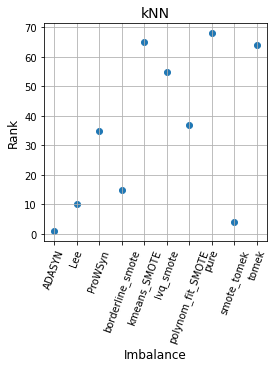

In [55]:
import matplotlib.pyplot as plt

i=0
_data = data_boxplot.melt(id_vars=['clf', 'imbl'])
for clf_name, datafr in _data.groupby('clf'):
    datafr = datafr.sort_values('clf')
    fig, ax = plt.subplots(figsize=(4,4))
    ax.scatter(x=datafr['imbl'], y=datafr['value'], cmap='tab20')
    ax.grid()
    ax.set_ylabel('Rank', fontsize=12)
    ax.set_xlabel('Imbalance', fontsize=12)
    ax.set_title(f'{clf_name}', fontsize=14)

    plt.xticks(rotation=70)
    plt.show()

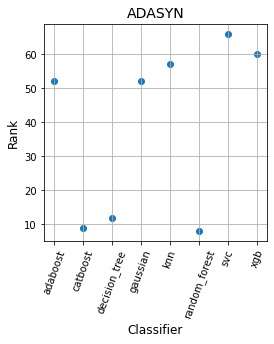

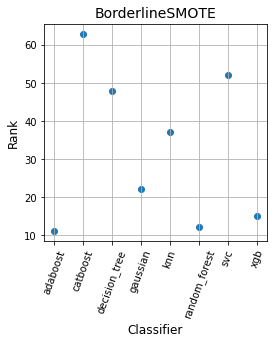

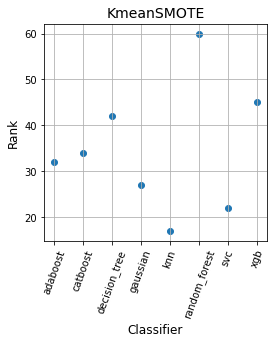

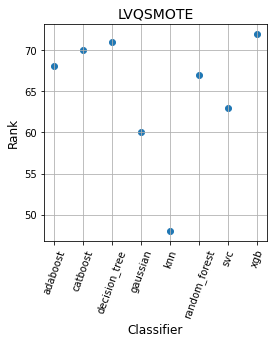

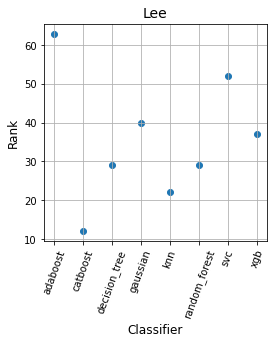

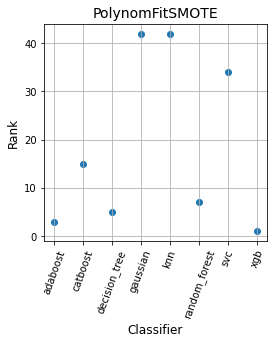

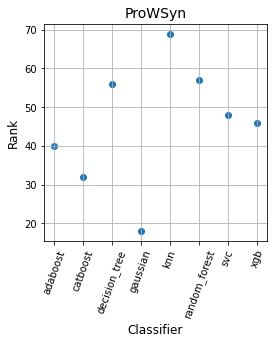

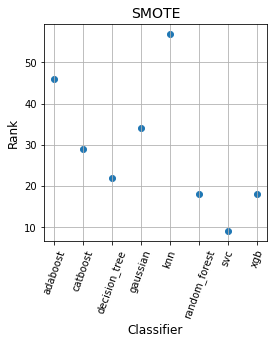

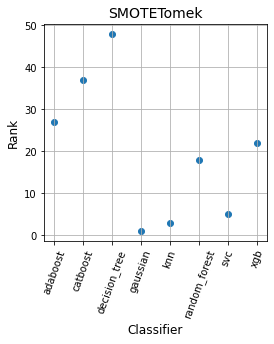

In [7]:
import matplotlib.pyplot as plt

i=0
_data = data_boxplot.melt(id_vars=['clf', 'imbl'])
for imbl_name, datafr in _data.groupby('imbl'):
    datafr = datafr.sort_values('imbl')
    fig, ax = plt.subplots(figsize=(4,4))
    ax.scatter(x=datafr['clf'], y=datafr['value'], cmap='tab20')
    ax.grid()
    ax.set_ylabel('Rank', fontsize=12)
    ax.set_xlabel('Classifier', fontsize=12)
    ax.set_title(f'{imbl_name}', fontsize=14)

    plt.xticks(rotation=70)
    plt.show()

In [56]:
data_boxplot[data_boxplot.imbl=='PolynomFitSMOTE']

,clf,imbl,rank_avg


In [57]:
data_boxplot

,clf,imbl,rank_avg
0,Adaboost,ADASYN,12.0
1,Adaboost,Lee,3.0
2,Adaboost,ProWSyn,21.0
3,Adaboost,borderline_smote,48.0
4,Adaboost,kmeans_SMOTE,52.0
...,...,...,...
65,kNN,lvq_smote,55.0
66,kNN,polynom_fit_SMOTE,37.0
67,kNN,pure,68.0
68,kNN,smote_tomek,4.0


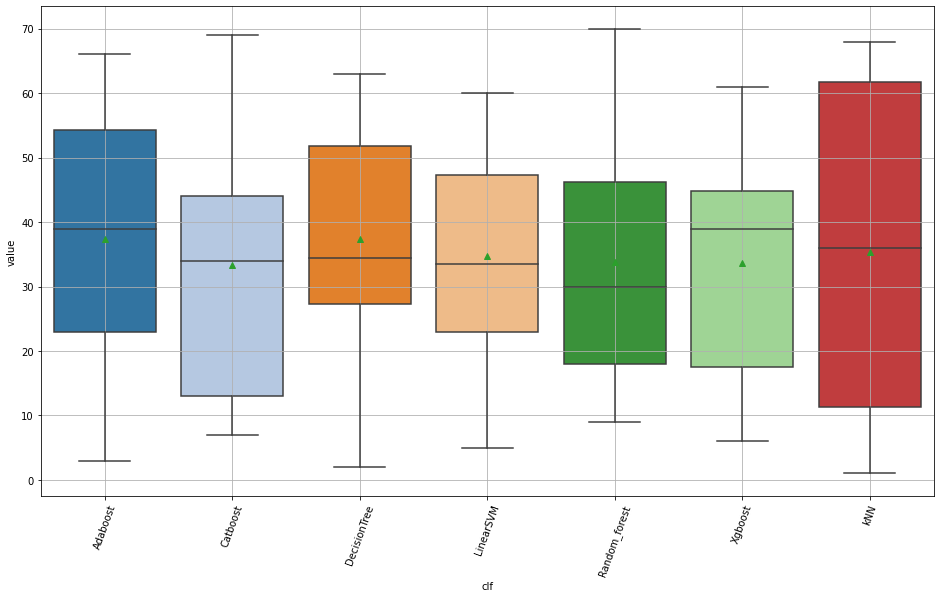

In [8]:
plt.figure(figsize=(16,9))
_data = data_boxplot.melt(id_vars=['clf', 'imbl'])
sns.boxplot(x="clf", y="value", data=_data, showmeans=True, linewidth=1.5,  palette="tab20")
plt.grid()
# plt.set_ylabel('Rank', fontsize=12)
# plt.set_xlabel('Imbalance', fontsize=12)
# ax.set_title(f'{clf_name}', fontsize=14)
plt.xticks(rotation=70)
plt.show()

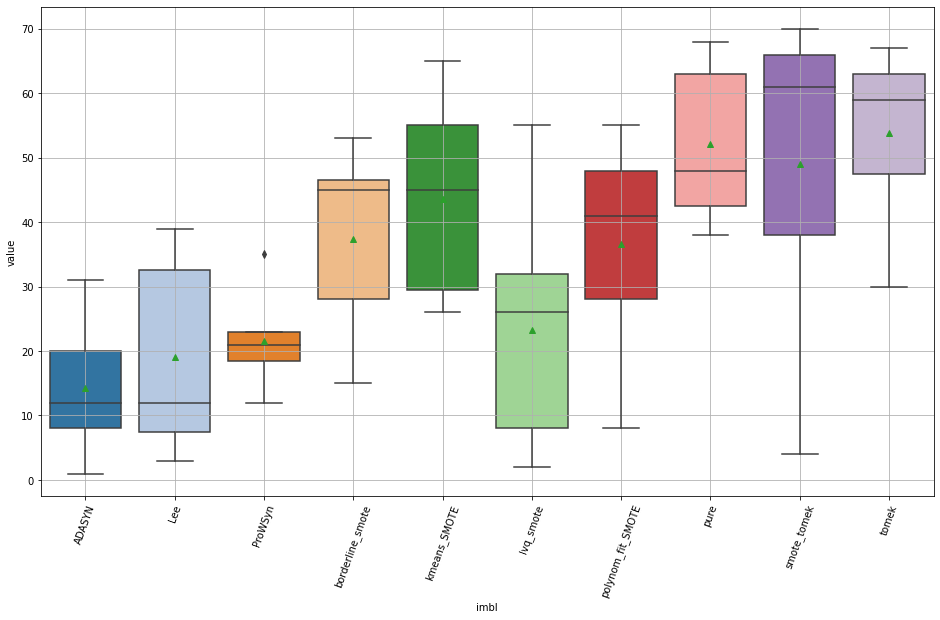

In [9]:
plt.figure(figsize=(16,9))
_data = data_boxplot.melt(id_vars=['clf', 'imbl'])
sns.boxplot(x="imbl", y="value", data=_data, showmeans=True, linewidth=1.5,  palette="tab20")
# plt.grid()
# plt.set_ylabel('Rank', fontsize=12)
# plt.set_xlabel('Imbalance', fontsize=12)
# ax.set_title(f'{clf_name}', fontsize=14)

plt.xticks(rotation=70)
plt.show()

In [10]:
_data = data_boxplot.melt(id_vars=['clf', 'imbl'])
test = _data[['clf', 'imbl']]
sns.boxplot(x="imbl", y="value", data=test, showmeans=True, linewidth=1.5,  palette="tab20")


,clf,imbl,variable,value
0,Adaboost,ADASYN,rank_avg,12.0
1,Adaboost,Lee,rank_avg,3.0
2,Adaboost,ProWSyn,rank_avg,21.0
3,Adaboost,borderline_smote,rank_avg,48.0
4,Adaboost,kmeans_SMOTE,rank_avg,52.0
...,...,...,...,...
65,kNN,lvq_smote,rank_avg,55.0
66,kNN,polynom_fit_SMOTE,rank_avg,37.0
67,kNN,pure,rank_avg,68.0
68,kNN,smote_tomek,rank_avg,4.0


In [98]:
result_table[(result_table.imbl=='ADASYN')].head(50)#&(result_table.rank<3.0)]

,clf,imbl,name,precision,recall,specificity,f1,gmean,mcc,balanced_acc,accuracy,rank
0,Adaboost,ADASYN,breast-cancer,0.549786,0.548750,0.812821,0.542706,0.660321,0.363164,0.680785,0.736000,4.0
1,Catboost,ADASYN,breast-cancer,0.766974,0.726250,0.899487,0.731752,0.802137,0.639774,0.812869,0.849091,3.0
2,DecisionTree,ADASYN,breast-cancer,0.768965,0.731250,0.902051,0.737161,0.806269,0.646056,0.816651,0.852364,3.0
3,LinearSVM,ADASYN,breast-cancer,0.478219,0.706250,0.677436,0.567246,0.688185,0.354750,0.691843,0.685818,7.0
4,Random_forest,ADASYN,breast-cancer,0.820778,0.723750,0.925641,0.757032,0.814063,0.678588,0.824696,0.866909,3.0
5,Xgboost,ADASYN,breast-cancer,0.792164,0.737500,0.912821,0.751482,0.815234,0.667499,0.825160,0.861818,3.0
6,kNN,ADASYN,breast-cancer,0.544562,0.753750,0.733333,0.626651,0.738574,0.455962,0.743542,0.739273,3.0
70,Adaboost,ADASYN,breast-cancer-coimbra,0.875312,0.898462,0.822000,0.882776,0.855239,0.733911,0.860231,0.865217,3.0
71,Catboost,ADASYN,breast-cancer-coimbra,0.914568,0.941538,0.882000,0.927123,0.910393,0.829409,0.911769,0.915652,2.0
72,DecisionTree,ADASYN,breast-cancer-coimbra,0.869551,0.889231,0.810000,0.874654,0.843810,0.711865,0.849615,0.854783,7.0


In [60]:
data_boxplot.groupby(['clf']).first()

,imbl,rank_avg
clf,,
Adaboost,ADASYN,12.0
Catboost,ADASYN,7.0
DecisionTree,ADASYN,31.0
LinearSVM,ADASYN,23.0
Random_forest,ADASYN,9.0
Xgboost,ADASYN,17.0
kNN,ADASYN,1.0


In [13]:
_data

,clf,imbl,variable,value
0,adaboost,ADASYN,rank_avg,52.0
1,adaboost,BorderlineSMOTE,rank_avg,11.0
2,adaboost,KmeanSMOTE,rank_avg,32.0
3,adaboost,LVQSMOTE,rank_avg,68.0
4,adaboost,Lee,rank_avg,63.0
...,...,...,...,...
67,xgb,Lee,rank_avg,37.0
68,xgb,PolynomFitSMOTE,rank_avg,1.0
69,xgb,ProWSyn,rank_avg,46.0
70,xgb,SMOTE,rank_avg,18.0


In [99]:
groups = ranking_table.groupby(['clf', 'imbl'])
clfs = list()
imbls = list()
lst_counts = []
n_datasets=12

sub_df = pd.DataFrame(index=list(range(1,n_datasets+1))).T

for name, datafr in groups:
    clfs.append(name[0])
    imbls.append(name[1])
    
    x = datafr[datafr.columns[2:14]].values
    unique, counts= np.unique(x, return_counts=True)
    dict_count = dict(zip(unique,counts))
    lst_counts.append(dict_count)
    
    sub_df = sub_df.append(dict_count, ignore_index=True)

In [100]:
datafr.columns

Index(['clf', 'imbl', 'breast-cancer', 'breast-cancer-coimbra', 'caesarian',
       'cervical-cancer-behavior', 'cervical-cancer-risk', 'diabetes',
       'diabetic-retinopathy-debrecen', 'eeg-eye-state', 'haberman',
       'heart_failure_clinical_records_dataset', 'parkinson', 'sonar', 'avg',
       'rank_avg'],
      dtype='object')

In [101]:
sub_df

,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,2.0,4.0,3.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
1,2.0,4.0,1.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3.0,4.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
3,1.0,2.0,NaN,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN
4,1.0,1.0,NaN,NaN,3.0,1.0,2.0,NaN,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,NaN,NaN,2.0,3.0,1.0,1.0,3.0,2.0,NaN,NaN,NaN
66,3.0,NaN,NaN,1.0,1.0,3.0,1.0,NaN,1.0,2.0,NaN,NaN
67,NaN,NaN,1.0,NaN,NaN,2.0,1.0,1.0,3.0,4.0,NaN,NaN
68,2.0,5.0,2.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN


In [102]:
rk_lst_col = [str(rank) for rank in range(1,13)]
sub_df.columns = rk_lst_col
sub_df['clf'] = clfs
sub_df['imbl'] = imbls
sub_df = sub_df.fillna(0)
sub_df

,1,2,3,4,5,6,7,8,9,10,11,12,clf,imbl
0,0.0,2.0,4.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Adaboost,ADASYN
1,2.0,4.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Adaboost,Lee
2,0.0,0.0,3.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,Adaboost,ProWSyn
3,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,Adaboost,borderline_smote
4,1.0,1.0,0.0,0.0,3.0,1.0,2.0,0.0,4.0,0.0,0.0,0.0,Adaboost,kmeans_SMOTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.0,0.0,0.0,2.0,3.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,kNN,lvq_smote
66,3.0,0.0,0.0,1.0,1.0,3.0,1.0,0.0,1.0,2.0,0.0,0.0,kNN,polynom_fit_SMOTE
67,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,3.0,4.0,0.0,0.0,kNN,pure
68,2.0,5.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,kNN,smote_tomek


In [103]:
sub_df[sub_df['1']>3]

,1,2,3,4,5,6,7,8,9,10,11,12,clf,imbl
43,4.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,Random_forest,borderline_smote
56,4.0,1.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,Xgboost,polynom_fit_SMOTE
60,5.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,kNN,ADASYN


In [105]:
result_table[(result_table.clf=='kNN')&(result_table.imbl=='ADASYN')]['rank'].value_counts()

1.0    5
3.0    3
2.0    2
7.0    1
5.0    1
Name: rank, dtype: int64

# Ranking

In [106]:
cum_ranking_imbl = sub_df.groupby(['imbl']).sum().groupby(level=0).cumsum().reset_index()
# cum_ranking_imbl['sum'] = cum_ranking_imbl.sum(axis=1)
cum_ranking_imbl

,imbl,1,2,3,4,5,6,7,8,9,10,11,12
0,ADASYN,14.0,10.0,17.0,10.0,8.0,9.0,8.0,4.0,4.0,0.0,0.0,0.0
1,Lee,8.0,7.0,11.0,20.0,15.0,9.0,9.0,3.0,2.0,0.0,0.0,0.0
2,ProWSyn,5.0,7.0,16.0,15.0,11.0,12.0,9.0,6.0,2.0,1.0,0.0,0.0
3,borderline_smote,11.0,10.0,4.0,10.0,5.0,7.0,11.0,7.0,8.0,11.0,0.0,0.0
4,kmeans_SMOTE,8.0,3.0,4.0,3.0,15.0,13.0,9.0,18.0,9.0,2.0,0.0,0.0
5,lvq_smote,11.0,13.0,7.0,7.0,14.0,10.0,11.0,7.0,3.0,1.0,0.0,0.0
6,polynom_fit_SMOTE,14.0,9.0,8.0,4.0,4.0,8.0,5.0,14.0,6.0,12.0,0.0,0.0
7,pure,5.0,7.0,4.0,5.0,5.0,11.0,7.0,11.0,11.0,18.0,0.0,0.0
8,smote_tomek,7.0,9.0,6.0,8.0,3.0,3.0,3.0,8.0,10.0,27.0,0.0,0.0
9,tomek,7.0,10.0,3.0,0.0,5.0,5.0,7.0,6.0,30.0,11.0,0.0,0.0


ValueError: Invalid color ['C0']

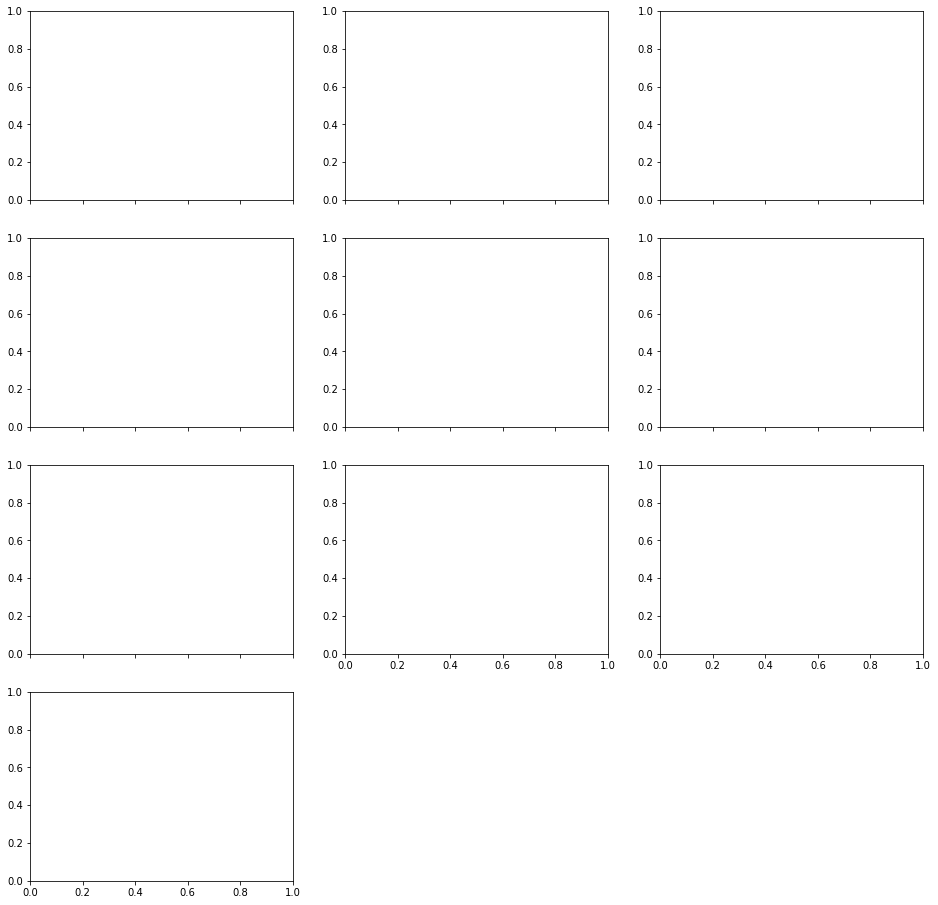

In [115]:
cum_ranking_imbl_plot = cum_ranking_imbl.set_index('imbl').T
cum_ranking_imbl_plot.plot(kind='bar', subplots=True, layout=(4,3),
                           figsize=(16,16),legend=False, color=[['C0']],
                          grid=True, rot=0)
# plt.subplots_adjust(hspace=.5)
plt.xticks(np.arange(0), 70+1, 1.0)
plt.show()

D:\PythonApp\imbalance_data\imbalance_data_handle\.envImbl\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


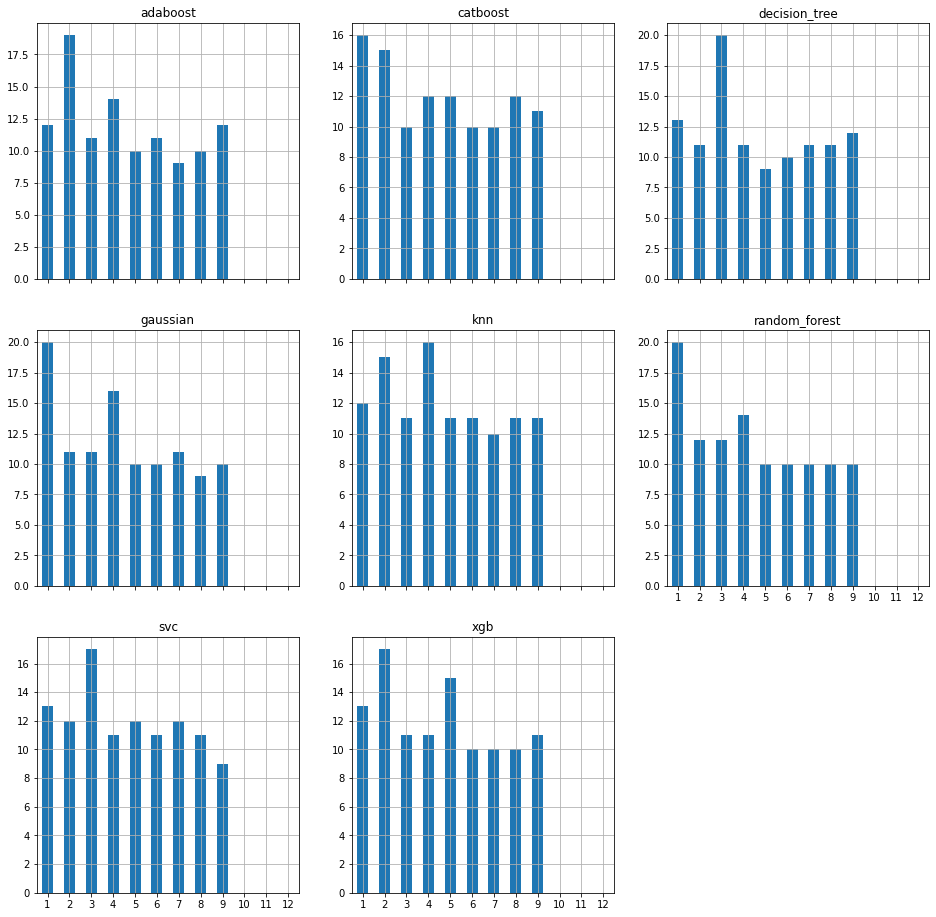

In [26]:
cum_ranking_clf = sub_df.groupby(['clf']).sum().groupby(level=0).cumsum().reset_index()
# cum_ranking_clf['sum'] = cum_ranking_clf.sum(axis=1)
cum_ranking_clf_plot = cum_ranking_clf.set_index('clf').T
cum_ranking_clf_plot.plot(kind='bar', subplots=True, layout=(3,3),
                           figsize=(16,16),legend=False, color=[['C0']],
                          grid=True, rot=0)
# plt.subplots_adjust(hspace=.5)
plt.show()

In [115]:
sub_df[sub_df.imbl=='ADASYN']

,1,2,3,4,5,6,7,8,9,10,11,12,clf,imbl
0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,adaboost,ADASYN
9,0.0,5.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,catboost,ADASYN
18,2.0,1.0,3.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,decision_tree,ADASYN
27,1.0,1.0,1.0,1.0,4.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,gaussian,ADASYN
36,0.0,3.0,0.0,1.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,knn,ADASYN
45,2.0,0.0,3.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,random_forest,ADASYN
54,1.0,0.0,2.0,1.0,0.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,svc,ADASYN
63,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,0.0,0.0,0.0,0.0,xgb,ADASYN


In [101]:
sub_df.groupby('clf').first()

,1,2,3,4,5,6,7,8,9,10,11,12,imbl
clf,,,,,,,,,,,,,
adaboost,1.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,ADASYN
catboost,0.0,5.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,ADASYN
decision_tree,2.0,1.0,3.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,ADASYN
gaussian,1.0,1.0,1.0,1.0,4.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,ADASYN
knn,0.0,3.0,0.0,1.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,ADASYN
random_forest,2.0,0.0,3.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,ADASYN
svc,1.0,0.0,2.0,1.0,0.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,ADASYN
xgb,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,0.0,0.0,0.0,0.0,ADASYN


In [6]:
import pandas as pd

d=pd.read_csv("./result/excel/raw_rank_avg.csv")

In [13]:
d[(d.clf=="Xgboost") &(d.dataset=="breast-cancer_10")].sort_values("gmean").head(50)

,clf,imbl,dataset,gmean,combine,rank
124,Xgboost,NRAS,breast-cancer_10,0.377367,Xgboost_NRAS,136
125,Xgboost,NearMiss,breast-cancer_10,0.587435,Xgboost_NearMiss,113
128,Xgboost,RandomUnderSampler,breast-cancer_10,0.684517,Xgboost_RandomUnderSampler,61
135,Xgboost,pure,breast-cancer_10,0.726411,Xgboost_pure,38
131,Xgboost,Tomek,breast-cancer_10,0.728589,Xgboost_Tomek,37
132,Xgboost,kmeans_SMOTE,breast-cancer_10,0.732101,Xgboost_kmeans_SMOTE,35
119,Xgboost,ADASYN,breast-cancer_10,0.740263,Xgboost_ADASYN,31
123,Xgboost,Lee,breast-cancer_10,0.741677,Xgboost_Lee,28
130,Xgboost,Smote_tomek,breast-cancer_10,0.743231,Xgboost_Smote_tomek,25
134,Xgboost,polynom_fit_SMOTE,breast-cancer_10,0.743703,Xgboost_polynom_fit_SMOTE,23


In [20]:
d[(d.clf=="Xgboost") &(d.dataset=="dataR2_90")].sort_values("gmean").head(50)

,clf,imbl,dataset,gmean,combine,rank
2264,Xgboost,EditedNearestNeighbours,dataR2_90,0.696486,Xgboost_EditedNearestNeighbours,146
2273,Xgboost,Tomek,dataR2_90,0.850191,Xgboost_Tomek,59
2270,Xgboost,RandomUnderSampler,dataR2_90,0.852071,Xgboost_RandomUnderSampler,54
2266,Xgboost,NRAS,dataR2_90,0.853676,Xgboost_NRAS,52
2267,Xgboost,NearMiss,dataR2_90,0.855933,Xgboost_NearMiss,46
2272,Xgboost,Smote_tomek,dataR2_90,0.856225,Xgboost_Smote_tomek,43
2277,Xgboost,pure,dataR2_90,0.856557,Xgboost_pure,42
2269,Xgboost,RandomOverSampler,dataR2_90,0.862285,Xgboost_RandomOverSampler,26
2268,Xgboost,ProWSyn,dataR2_90,0.863611,Xgboost_ProWSyn,23
2275,Xgboost,lvq_smote,dataR2_90,0.865616,Xgboost_lvq_smote,19


<AxesSubplot:ylabel='Frequency'>

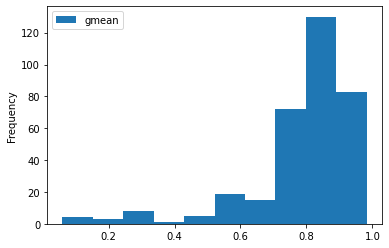

In [28]:
d[(d.clf=="Xgboost")].sort_values("gmean")[["imbl", "clf","gmean"]].plot.hist()

In [16]:
d.dataset.value_counts()

breast-cancer_10    153
breast-cancer_30    153
diabetes_70         153
diabetes_50         153
diabetes_30         153
diabetes_10         153
dataR2_90           153
dataR2_70           153
dataR2_50           153
dataR2_30           153
dataR2_10           153
caesarian_90        153
caesarian_70        153
caesarian_50        153
caesarian_30        153
caesarian_10        153
breast-cancer_90    153
breast-cancer_70    153
breast-cancer_50    153
diabetes_90         153
Name: dataset, dtype: int64